<a href="https://colab.research.google.com/github/bnv20/Caba_nlp/blob/main/DL21_classifying_newswires_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [ ]:
from keras.datasets import reuters
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [ ]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터
# 사용자 함수
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# 내장함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 훈련검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 28ms/step - loss: 3.2357 - accuracy: 0.4014 - val_loss: 1.8091 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6004 - accuracy: 0.6893 - val_loss: 1.3542 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1359 - accuracy: 0.7575 - val_loss: 1.1649 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8977 - accuracy: 0.8126 - val_loss: 1.0576 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7296 - accuracy: 0.8510 - val_loss: 0.9725 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5850 - accuracy: 0.8793 - val_loss: 0.9595 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4744 - accuracy: 0.8984 - val_loss: 0.9284 - val_accuracy: 0.8030
Epoch 8/20
16

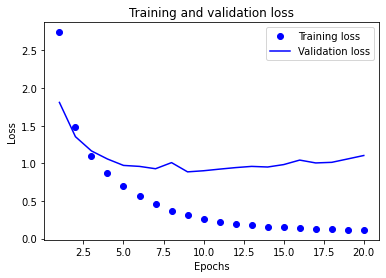

In [ ]:
# 손실과 정확도 곡선
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

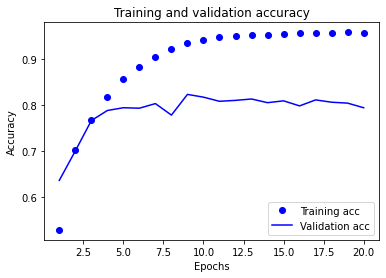

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 적절한 epochs 9 적용, 모델 훈련 및 테스트 세트에서 평가
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 3.1109 - accuracy: 0.3916 - val_loss: 1.7372 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4959 - accuracy: 0.6905 - val_loss: 1.2979 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0751 - accuracy: 0.7719 - val_loss: 1.1430 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8414 - accuracy: 0.8173 - val_loss: 1.0402 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6684 - accuracy: 0.8571 - val_loss: 0.9642 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5245 - accuracy: 0.8974 - val_loss: 0.9420 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4117 - accuracy: 0.9187 - val_loss: 0.9093 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [ ]:
results

[1.0157506465911865, 0.7809438705444336]

In [ ]:
predictions = model.predict(x_test)
predictions


array([[7.5423236e-06, 2.6791267e-05, 2.8150268e-06, ..., 1.2146693e-06,
        7.5503772e-06, 1.2597488e-05],
       [2.2470327e-02, 4.0757931e-03, 3.5744981e-04, ..., 2.6003861e-06,
        2.5700856e-06, 1.6244888e-06],
       [2.0126734e-02, 7.0133352e-01, 1.4625954e-03, ..., 5.9222581e-04,
        3.8187043e-04, 4.7161832e-04],
       ...,
       [4.0818901e-05, 3.0403092e-04, 6.0860017e-05, ..., 8.2115039e-06,
        3.8823284e-05, 1.3778667e-04],
       [2.6784246e-03, 2.6895128e-02, 1.7930871e-03, ..., 1.4262965e-04,
        3.0592055e-04, 4.2256343e-04],
       [1.8872297e-03, 5.5681515e-01, 7.7509210e-03, ..., 1.9210082e-04,
        3.8472968e-04, 3.3704878e-04]], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
# 은닉층 4로 수정

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.3374 - accuracy: 0.2113 - val_loss: 2.3285 - val_accuracy: 0.6020
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9938 - accuracy: 0.6266 - val_loss: 1.5316 - val_accuracy: 0.6560
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3171 - accuracy: 0.7004 - val_loss: 1.3755 - val_accuracy: 0.6790
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1260 - accuracy: 0.7186 - val_loss: 1.3002 - val_accuracy: 0.6950
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0170 - accuracy: 0.7408 - val_loss: 1.2840 - val_accuracy: 0.7040
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9059 - accuracy: 0.7597 - val_loss: 1.3048 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8227 - accuracy: 0.7780 - val_loss: 1.2821 - val_accuracy: 0.7100
Epoch 8/20
63/63 [==